<h2><strong>Kelompok J</strong></h2>


*   Teguh Saputra (1906375700)
*   Athaya Yumna Fathiyah (1906296192)
*   Cindy Fara Nabila (2006463774)
*   Karin Marshanda (1906299515)








<center><h2><strong><font color="blue">Study Case 01 - Data Mining dan Business Intelligence: EDA pada data property</font></strong></h2></center>

<img alt="" src="https://github.com/taufiksutanto/ADM-Case-01-EDA/blob/main/images/Ray-pink-Property-Case-Banner.jpg?raw=1"/>

# Kasus:

* Anda adalah seorang Data Analyst yang bekerja di PT **Ray Pink Property Indonesia** (RPPI).
* RPPI adalah perusahaan property yang berdiri sejak 11 tahun yang lalu.
* RPPI memliki kantor cabang di 7 propinsi di Indonesia dan jumlahnya terus bertambah.
* Valuasi RPPI tahun ini mencapai Rp 7 Trilyun, meningkat 7% dari tahun sebelumnya.
* Bidang usaha RPPI adalah investasi dan jual-beli property secara umum, termasuk bekerja sama dengan developer perumahan.
* Data Engineer (DE)/Database Administrator (DBA) RPPI berhasil mengumpulkan data rumah-rumah yang dijual di beberapa kota di Indonesia.
* Sebagai Data Analyst anda akan hadir dan melakukan presentasi pada rapat direksi untuk memberikan insight dari data ke upper management (C-Level, senior managers, dan komisaris perusahaan).
* Di studi kasus ini anda mempersiapkan "bahan presentasi" dengan cara melakukan EDA pada data yang diterima dari DE/DBA.

# Petunjuk:

Di studi kasus pertama, anda mendapat bantuan keterangan dari manajemen. Setelah berdiskusi *over lunch* dengan beberapa manager senior, anda mendengar bahwa mereka ingin mengetahui:

1. Kualitas data yang dimiliki perusahaan.
2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi *data driven company* yang unggul.
3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?
4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).
5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?
6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan?
7. Dan yang terpenting, informasi berharga apa lagi yang bisa anda dapatkan dari data?

# Catatan:

* Anda diperbolehkan melakukan augmentasi data (menambah data eksternal).
* Yakinkan menuliskan asumsi anda atas kesimpulan dan rekomendasi yang diberikan ke perusahaan.
* Yakinkan kesimpulan dan rekomendasi ditujukan ke perusahaan (bukan dosen mata kuliah).
* Anda boleh menggunakan software visualisasi apapun, misal excel, Ms Word, Photoshop, dsb.
* Yakinkan file images dapat dibuka (nampak) saat ipynb di Jupyter notebook anda dibuka di Google Colab.
 - Tips: hati-hati dalam melakukan penamaan file, Google colab case sensitive.
* Interpretasi diberikan menggunakan cell markdown tepat dibawah output code yang relevan diatasnya.
* Anda tidak diperkenankan bertanya pertanyaan yang:
 - Merupakan jawaban atau menjurus ke jawaban studi kasus.
 - Debugging - code error (anda diharapkan melakukan code troubleshooting sendiri via mesin pencari)

# Komponen Penilaian:

* Code tidak diubah sejak deadline studi kasus.
* Code dapat di "Run-All" di Google Colab oleh dosen tanpa error.
* Pemilihan preprocessing dan visualisasi yang tepat
* Interpretasi dan rekomendasi dengan narasi dan kualitas yang baik, serta berdasarkan atas (pengolahan) data.
* Kreativitas dan inovasi pengolahan data dan penyajian visualisasi.

# Data Understanding (DD):

* TBA

In [106]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

try: # Running Locally, yakinkan "file_" berada di folder "data"
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')    
except: # Running in Google Colab
    !mkdir data
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/jakarta.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/depok.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bogor.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/tangerang.csv
    !wget -P data/ https://raw.githubusercontent.com/taufiksutanto/ADM-Case-01-EDA/master/data/bekasi.csv
    dfJ = pd.read_csv("data/jakarta.csv", low_memory = False, encoding='utf8')
    dfD = pd.read_csv("data/depok.csv", low_memory = False, encoding='utf8')
    dfB = pd.read_csv("data/bogor.csv", low_memory = False, encoding='utf8')
    dfT = pd.read_csv("data/tangerang.csv", low_memory = False, encoding='utf8')
    dfX = pd.read_csv("data/bekasi.csv", low_memory = False, encoding='utf8')
    
dfJ.shape, dfD.shape, dfB.shape, dfT.shape, dfX.shape

((1024, 26), (998, 26), (999, 26), (128, 26), (992, 26))

**Preprocessing Data Jakarta**

In [107]:
dfJ.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,06-12-2021,202.0,198.0,8.0,3.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,02-12-2021,30.0,55.0,2.0,1.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,19.0,35.0,2.0,1.0,NaN,NaN,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,33.0,42.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,30.0,55.0,2.0,2.0,NaN,1.0,Jakarta Pusat,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [108]:
dfJ.isnull().sum() 

created_at      903
LT              903
LB              903
KT              903
KM              903
garasi          980
carport         934
lokasi          903
sertifikat      905
listrik         904
hadap           988
harga           903
URL             903
deskripsi       912
Unnamed: 14    1024
Unnamed: 15    1024
Unnamed: 16    1024
Unnamed: 17    1024
Unnamed: 18    1024
Unnamed: 19    1024
Unnamed: 20    1024
Unnamed: 21    1024
Unnamed: 22    1024
Unnamed: 23    1024
Unnamed: 24    1024
Unnamed: 25    1024
dtype: int64

In [109]:
dfJ.drop(dfJ.columns[[14,15,16,17,18,19,20,21,22,23,24,25]], axis = 1, inplace = True)

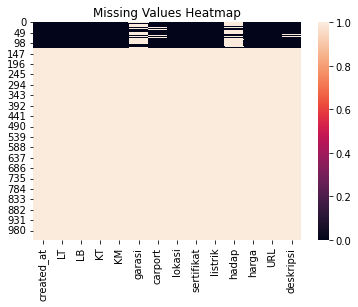

In [110]:
sns.heatmap(dfJ.isna())
plt.title('Missing Values Heatmap', y=1.025)

plt.show()

In [111]:
dfJ.dropna(subset=['LT',"LB",'KT','KM',"sertifikat"],inplace=True)

In [112]:
dfJ.shape

(119, 14)

In [113]:
dfJ.duplicated().sum()

0

**Prepocessing Data Depok**

In [114]:
dfD.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,6-12-2021,165,200.0,4.0,2.0,NaN,1.0,Sukmajaya,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cipayung,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,6-12-2021,50,36.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,6-12-2021,50,45.0,2.0,1.0,NaN,NaN,Cimanggis,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,6-12-2021,72,45.0,2.0,1.0,NaN,1.0,Sawangan,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
dfD.isnull().sum()

created_at     879
LT             878
LB             880
KT             880
KM             880
garasi         973
carport        904
lokasi         880
sertifikat     880
listrik        895
hadap          936
harga          880
URL            880
deskripsi      880
Unnamed: 14    998
Unnamed: 15    998
Unnamed: 16    998
Unnamed: 17    998
Unnamed: 18    998
Unnamed: 19    998
Unnamed: 20    998
Unnamed: 21    998
Unnamed: 22    998
Unnamed: 23    998
Unnamed: 24    998
Unnamed: 25    998
dtype: int64

In [116]:
dfD.drop(dfD.columns[[12,13,14,15,16,17,18,19,20,21,22,23,24,25]], axis = 1, inplace = True)

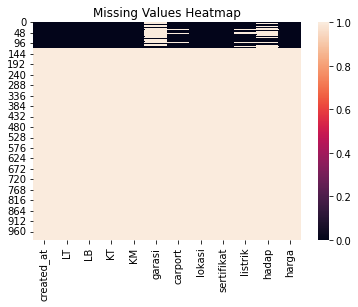

In [117]:
sns.heatmap(dfD.isna())
plt.title('Missing Values Heatmap', y=1.025)

plt.show()

In [118]:
dfD.dropna(subset=['LT','LB','KT','KM','sertifikat'],inplace=True)

In [119]:
dfD.shape

(118, 12)

In [120]:
dfD.isnull().sum()

created_at     0
LT             0
LB             0
KT             0
KM             0
garasi        93
carport       24
lokasi         0
sertifikat     0
listrik       15
hadap         56
harga          0
dtype: int64

In [121]:
dfD.duplicated().sum()

6

**Preprocessing Data Bogor**

In [122]:
dfB.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [123]:
dfB.drop(dfB.columns[[12,13,14,15,16,17,18,19,20,21,22,23,24,25]], axis = 1, inplace = True)
dfB.info()
print('\n')
display(dfB.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   created_at  193 non-null    object 
 1   LT          193 non-null    float64
 2   LB          193 non-null    float64
 3   KT          193 non-null    float64
 4   KM          193 non-null    float64
 5   garasi      193 non-null    float64
 6   carport     193 non-null    float64
 7   lokasi      193 non-null    object 
 8   sertifikat  193 non-null    object 
 9   listrik     193 non-null    float64
 10  hadap       19 non-null     object 
 11  harga       193 non-null    float64
dtypes: float64(8), object(4)
memory usage: 93.8+ KB




,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
0,03-12-2021,75.0,38.0,2.0,1.0,1.0,1.0,Bojonggede,SHM,1300.0,Barat,6.925500e+08
1,06-12-2021,60.0,40.0,1.0,1.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,8.114000e+08
2,06-12-2021,60.0,50.0,2.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,9.005000e+08
3,06-12-2021,60.0,70.0,3.0,2.0,0.0,1.0,Babakan Madang,SHM,2200.0,NaN,1.001900e+09
4,06-12-2021,90.0,60.0,3.0,2.0,0.0,2.0,Babakan Madang,SHM,2200.0,NaN,1.200800e+09


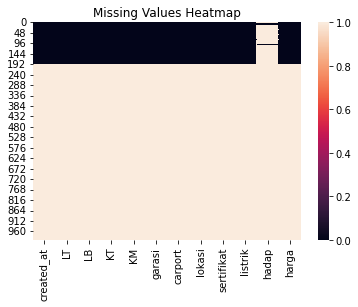

In [124]:
sns.heatmap(dfB.isna())
plt.title('Missing Values Heatmap', y=1.025)

plt.show()

In [125]:
(dfB.isna().sum() / len(dfB)) * 100

created_at    80.680681
LT            80.680681
LB            80.680681
KT            80.680681
KM            80.680681
garasi        80.680681
carport       80.680681
lokasi        80.680681
sertifikat    80.680681
listrik       80.680681
hadap         98.098098
harga         80.680681
dtype: float64

In [126]:
dfB.dropna(subset=['LT',"LB",'KT','KM','sertifikat'],inplace=True)

In [127]:
dfB.duplicated().sum()

0

Prepocessing Data Tangerang

In [128]:
dfT.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,12-06-2021,60.0,50.0,3.0,2.0,NaN,NaN,"BSD CITY, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,12-06-2021,72.0,54.0,2.0,1.0,1.0,1.0,"CISAUK, TANGERANG",SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,12-06-2021,60.0,48.0,3.0,2.0,2.0,2.0,"CILEDUG, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,12-06-2021,200.0,225.0,5.0,4.0,NaN,NaN,"LIPPO KARAWACI, TANGERANG",SHM,5500.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,12-06-2021,76.0,123.0,3.0,3.0,NaN,2.0,"PONDOK CABE, TANGERANG",SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [129]:
dfT.isnull().sum() 

created_at       4
LT               4
LB               4
KT               4
KM               4
garasi          90
carport         36
lokasi           4
sertifikat       6
listrik         17
hadap           79
harga            4
URL              4
deskripsi        4
Unnamed: 14    128
Unnamed: 15    128
Unnamed: 16    128
Unnamed: 17    128
Unnamed: 18    128
Unnamed: 19    128
Unnamed: 20    128
Unnamed: 21    128
Unnamed: 22    128
Unnamed: 23    128
Unnamed: 24    128
Unnamed: 25    128
dtype: int64

In [130]:
dfT.drop(dfX.columns[[12,13,14,15,16,17,18,19,20,21,22,23,24,25]], axis = 1, inplace = True)

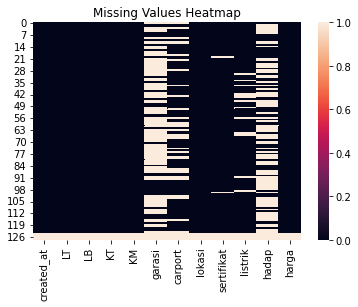

In [131]:
sns.heatmap(dfT.isna())
plt.title('Missing Values Heatmap', y=1.025)

plt.show()

In [132]:
dfT.dropna(subset=['LT',"LB",'KT','KM',"sertifikat"],inplace=True)

In [133]:
dfT.shape

(122, 12)

In [134]:
dfT.duplicated().sum()

0

**Preprocessing Data Bekasi**

In [135]:
dfX.head()

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,...,Unnamed: 16,Unnamed: 17,Unnamed: 18,Unnamed: 19,Unnamed: 20,Unnamed: 21,Unnamed: 22,Unnamed: 23,Unnamed: 24,Unnamed: 25
0,08-12-2021,71.0,43.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,1300.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,08-12-2021,59.0,60.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,08-12-2021,124.0,95.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,08-12-2021,144.0,100.0,2.0,1.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,08-12-2021,108.0,100.0,3.0,2.0,NaN,1.0,Kabupaten Bekasi,SHM,2200.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [136]:
dfX.isnull().sum() 

created_at     885
LT             885
LB             885
KT             885
KM             886
garasi         959
carport        911
lokasi         885
sertifikat     886
listrik        891
hadap          944
harga          885
URL            885
deskripsi      885
Unnamed: 14    992
Unnamed: 15    992
Unnamed: 16    992
Unnamed: 17    992
Unnamed: 18    992
Unnamed: 19    992
Unnamed: 20    992
Unnamed: 21    992
Unnamed: 22    992
Unnamed: 23    992
Unnamed: 24    992
Unnamed: 25    992
dtype: int64

In [137]:
dfX.drop(dfX.columns[[12,13,14,15,16,17,18,19,20,21,22,23,24,25]], axis = 1, inplace = True)

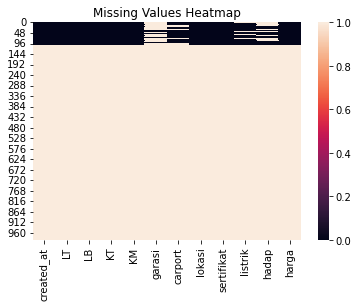

In [138]:
sns.heatmap(dfX.isna())
plt.title('Missing Values Heatmap', y=1.025)

plt.show()

In [139]:
dfX.dropna(subset=['LT',"LB",'KT','KM',"sertifikat"],inplace=True)

In [140]:
dfX.shape

(106, 12)

In [141]:
dfX.duplicated().sum()

4

**Membersihkan outlier**

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


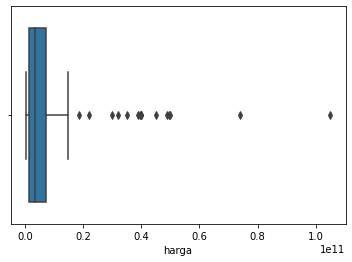

In [142]:
sns.boxplot(dfJ['harga'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


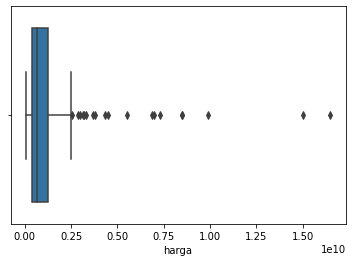

In [143]:
sns.boxplot(dfB['harga'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


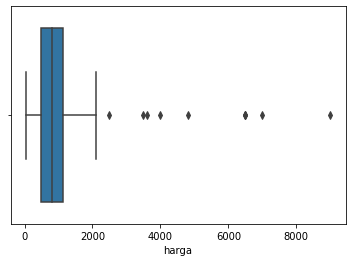

In [144]:
sns.boxplot(dfD['harga'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


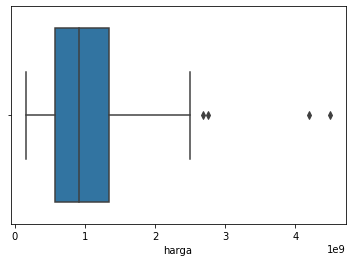

In [145]:
sns.boxplot(dfX['harga'])

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


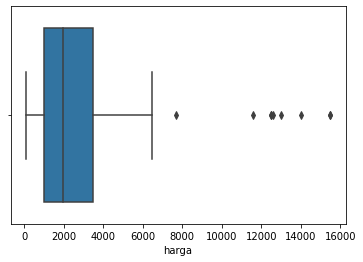

In [146]:
sns.boxplot(dfT['harga'])

**Rata-rata harga perkota**

In [147]:
data = {'Kota': dfJ['harga'].mean,
        'dua' : [2,2,2,2,2],
        'tiga': [3,3,3,3,3]}

df = pd.DataFrame(data, index=['a','b','c','d','e'])

df.head()

,Kota,dua,tiga
a,<bound method NDFrame._add_numeric_operations....,2,3
b,<bound method NDFrame._add_numeric_operations....,2,3
c,<bound method NDFrame._add_numeric_operations....,2,3
d,<bound method NDFrame._add_numeric_operations....,2,3
e,<bound method NDFrame._add_numeric_operations....,2,3


###1. Kualitas data yang dimiliki perusahaan

Kualitas data yang kami peroleh dari perusahaan cukup kotor, banyak sekali missing value yang diakibatkan dari beberapa faktor, salah satunya adalah salah input. Pada case kali ini, kami membersihkan missing value di kolom LT, LB, KT, KM, serta sertifikat karena kolom tersebut merupakan hal yang cukup krusial dalam pertimbangan pembeli/komsumen dalam membeli rumah.

###2. Apakah ada saran perbaikan data ke DE/DBA perusahaan agar RPPI menjadi data driven company yang unggul.

Agar menjadi data driven company yang unggul, perusahaan dapat melakukan hal-hal berikut ini:
- Membersihkan data yang ada. Seperti menghapus kolom yang tidak digunakan seperti pada kolom ke 14-25. Juga dapat membersihkan missing value.
- Menambahkan kolom baru yang berisi : jarak ke transportasi umum terdekat, jarak ke rumah sakit terdekat, jarak ke sekolah terdekat, dan tingkat rawan bencana.
keempat hal ini dapat menjadi pertimbangan konsumen dalam membeli properti. Sehingga dapat berguna untuk perusahaan menentukan kebijakan.

### 3. Dari data yang ada, apakah ada kecenderungan rumah disuatu kota lebih mahal/murah dibandingkan kota lain?

Terlihat dari mean dan boxplot di atas yang ada pada no 5 bahwa Jakarta cenderung memiliki harga yang lebih mahal dibandingkan kota-kota lain

### 4. Dari data yang ada, apakah bisa dibuat rekomendasi sebaiknya RPPI membuat kantor cabang berikutnya di kota mana? Mengapa? (Asumsikan RPPI belum memiliki cabang di kota-kota yang disebutkan di data).

Depok, karena terlihat pada boxplot diatas bahwa Depok memiliki harga yang cenderung murah dan lokasinya cukup strategis karena dekat dengan Ibu Kota

###5. Rumah dengan karakteristik seperti apa yang paling banyak dijual?

In [148]:
dfJ.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga,URL,deskripsi
count,119,119.000000,119.000000,119.000000,119.000000,43.000000,89.000000,119,119,118.000000,36,1.190000e+02,119,110
unique,19,NaN,NaN,NaN,NaN,NaN,NaN,5,7,NaN,10,NaN,118,110
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Jakarta Barat,SHM,NaN,Timur,NaN,https://www.rumah.com/listing-properti/dijual-...,Dekat Cikini Salemba Taman Isamail Marzuki Kam...
freq,41,NaN,NaN,NaN,NaN,NaN,NaN,25,90,NaN,10,NaN,2,1
mean,NaN,250.159664,281.991597,4.294118,3.394958,1.860465,1.955056,NaN,NaN,5461.016949,NaN,9.080425e+09,NaN,NaN
std,NaN,370.934573,286.996973,1.910510,1.718388,1.536561,1.484083,NaN,NaN,7952.519720,NaN,1.599238e+10,NaN,NaN
min,NaN,16.000000,21.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,NaN,3.800000e+08,NaN,NaN
25%,NaN,84.500000,93.500000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,1.550000e+09,NaN,NaN
50%,NaN,140.000000,200.000000,4.000000,3.000000,1.000000,2.000000,NaN,NaN,3500.000000,NaN,3.400000e+09,NaN,NaN
75%,NaN,255.000000,375.000000,5.000000,4.000000,2.000000,2.000000,NaN,NaN,4475.000000,NaN,7.375000e+09,NaN,NaN


In [149]:
dfD.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
count,118,118,118.000000,118.000000,118.000000,25.000000,94.000000,118,118,103.000000,62,118.000000
unique,3,56,NaN,NaN,NaN,NaN,NaN,11,2,NaN,6,NaN
top,5-12-2021,50,NaN,NaN,NaN,NaN,NaN,Sawangan,SHM,NaN,Utara,NaN
freq,74,12,NaN,NaN,NaN,NaN,NaN,30,116,NaN,19,NaN
mean,NaN,NaN,92.618644,2.737288,1.940678,1.760000,1.670213,NaN,NaN,2147.572816,NaN,1194.440678
std,NaN,NaN,92.630404,1.024720,0.980950,1.392839,1.061428,NaN,NaN,1166.261386,NaN,1474.387409
min,NaN,NaN,15.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,NaN,41.000000
25%,NaN,NaN,46.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,NaN,485.000000
50%,NaN,NaN,61.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,810.000000
75%,NaN,NaN,102.250000,3.000000,2.000000,2.000000,2.000000,NaN,NaN,2200.000000,NaN,1137.500000


In [150]:
dfB.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
count,193,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193,193,193.000000,19,1.930000e+02
unique,7,NaN,NaN,NaN,NaN,NaN,NaN,27,3,NaN,7,NaN
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Gunung Putri,SHM,NaN,Selatan,NaN
freq,52,NaN,NaN,NaN,NaN,NaN,NaN,26,155,NaN,5,NaN
mean,NaN,143.575130,98.663212,2.694301,1.797927,0.155440,1.310881,NaN,NaN,2076.165803,NaN,1.289362e+09
std,NaN,191.576208,125.851746,1.110939,1.175087,0.485931,0.905271,NaN,NaN,1562.633932,NaN,2.115854e+09
min,NaN,30.000000,21.000000,1.000000,1.000000,0.000000,0.000000,NaN,NaN,900.000000,NaN,6.500000e+07
25%,NaN,66.000000,36.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,NaN,3.990000e+08
50%,NaN,84.000000,58.000000,2.000000,1.000000,0.000000,1.000000,NaN,NaN,1300.000000,NaN,6.700000e+08
75%,NaN,120.000000,90.000000,3.000000,2.000000,0.000000,1.000000,NaN,NaN,2200.000000,NaN,1.250000e+09


In [151]:
dfT.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
count,122,122.000000,122.000000,122.000000,122.000000,36.000000,90.000000,122,122,109.000000,48,122.000000
unique,3,NaN,NaN,NaN,NaN,NaN,NaN,40,3,NaN,7,NaN
top,12-06-2021,NaN,NaN,NaN,NaN,NaN,NaN,"BSD, TANGERANG",SHM,NaN,Utara,NaN
freq,100,NaN,NaN,NaN,NaN,NaN,NaN,27,96,NaN,18,NaN
mean,NaN,178.409836,178.655738,3.327869,2.663934,2.000000,1.511111,NaN,NaN,3328.440367,NaN,2986.434426
std,NaN,115.333348,161.994887,1.094257,1.283143,1.373213,0.851231,NaN,NaN,3164.300044,NaN,3222.247999
min,NaN,37.000000,27.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,NaN,95.000000
25%,NaN,90.000000,80.500000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,1012.500000
50%,NaN,147.000000,124.000000,3.000000,2.000000,2.000000,1.000000,NaN,NaN,2200.000000,NaN,1950.000000
75%,NaN,240.750000,225.000000,4.000000,3.000000,2.000000,2.000000,NaN,NaN,3500.000000,NaN,3487.500000


In [152]:
dfX.describe(include='all')

,created_at,LT,LB,KT,KM,garasi,carport,lokasi,sertifikat,listrik,hadap,harga
count,106,106.000000,106.000000,106.000000,106.000000,32.000000,81.000000,106,106,101.000000,48,1.060000e+02
unique,8,NaN,NaN,NaN,NaN,NaN,NaN,2,3,NaN,4,NaN
top,06-12-2021,NaN,NaN,NaN,NaN,NaN,NaN,Kota Bekasi,SHM,NaN,Selatan,NaN
freq,30,NaN,NaN,NaN,NaN,NaN,NaN,72,95,NaN,23,NaN
mean,NaN,106.415094,107.018868,2.943396,1.943396,1.093750,1.086420,NaN,NaN,2056.435644,NaN,1.061520e+09
std,NaN,53.924262,61.521964,1.012589,0.848867,0.296145,0.282734,NaN,NaN,969.578861,NaN,7.424203e+08
min,NaN,36.000000,30.000000,1.000000,1.000000,1.000000,1.000000,NaN,NaN,900.000000,NaN,1.600000e+08
25%,NaN,72.000000,60.000000,2.000000,1.000000,1.000000,1.000000,NaN,NaN,1300.000000,NaN,5.777500e+08
50%,NaN,90.500000,90.000000,3.000000,2.000000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,9.100000e+08
75%,NaN,126.000000,143.750000,3.750000,2.750000,1.000000,1.000000,NaN,NaN,2200.000000,NaN,1.350000e+09


In [153]:
from collections import Counter

In [154]:
Counter(dfJ['sertifikat'])

Counter({'SHM': 90,
         'SHGB': 8,
         'SHM + IMB': 11,
         'SHM + IMB + PBB': 1,
         'SHM + Hak Pakai': 1,
         'PPJB': 7,
         'AJB': 1})

In [155]:
Counter(dfD['sertifikat'])

Counter({'SHM': 116, 'Lainnya': 2})

In [156]:
Counter(dfB['sertifikat'])

Counter({'SHM': 155, 'SHGB': 33, 'Lainnya': 5})

In [157]:
Counter(dfT['sertifikat'])

Counter({'SHM': 96, 'HGB': 11, 'lainnya(PPJB, GIRIK, ADAT, dll)': 15})

Berdasarkan perhitungan di atas, terlihat bahwa pada setiap daerah rumah yang banyak terjual adalah rumah dengan jenis sertifikat SHM. SHM merupakan jenis sertifikat yang hak penggunanya berlaku seumur hidup, tidak seperti jenis sertifikat lainnya.

###6. Jika RPPI ingin melakukan investasi (max) Rp. 25 Milyar minggu besok, apakah dari data anda dapat memberikan rekomendasi rumah mana saja yang akan berpotensi menghasilkan keuntungan bagi perusahaan